[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 05** | Limpeza e preparação de dados | Exercício 5.1

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 06 de junho de 2025.

---

# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

In [314]:
# Importando as bibliotecas

import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)

(27028, 69)


In [225]:
# Verifica se há duplicadas
sinasc.drop_duplicates().shape

(27028, 69)

In [226]:
# Contando os valores de NaN para cada uma das variáveis

sinasc_mv = sinasc.isnull().sum()

print(sinasc_mv)

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64


In [227]:
# criando um df só com as colunas que interessam:

variables = ['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',   'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 

sinasc_filtered = sinasc.loc[:, variables]

print(sinasc_filtered)


       LOCNASC  IDADEMAE  ESTCIVMAE           ESCMAE  QTDFILVIVO  \
0            1        19        5.0      8 a 11 anos         0.0   
1            1        29        2.0      8 a 11 anos         1.0   
2            1        37        9.0      8 a 11 anos         2.0   
3            1        30        5.0  12 anos ou mais         0.0   
4            1        30        2.0      8 a 11 anos         1.0   
...        ...       ...        ...              ...         ...   
27023        1        32        2.0  12 anos ou mais         1.0   
27024        1        19        1.0      8 a 11 anos         0.0   
27025        1        24        2.0      8 a 11 anos         0.0   
27026        1        21        2.0      8 a 11 anos         1.0   
27027        1        18        5.0      8 a 11 anos         1.0   

              GESTACAO GRAVIDEZ  CONSULTAS  APGAR5  
0      37 a 41 semanas    Única          4    10.0  
1      37 a 41 semanas    Única          4     9.0  
2      37 a 41 semanas  

In [228]:
# contando os NaNs do novo df:

print(f'o número de valores NaN para cada variável é: \n {sinasc_filtered.isnull().sum()}')


o número de valores NaN para cada variável é: 
 LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64


In [229]:
# 4) dropando os nulls da coluna 'APGAR5'

sinasc_cleaned  =  sinasc_filtered.dropna(
    subset=['APGAR5'])

print(f'o número de valores NaN para cada variável é: \n{sinasc_cleaned.isnull().sum()}')

o número de valores NaN para cada variável é: 
LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64


In [230]:
# 5) valores para as colunas 'ESTCIVMAE' e  'CONSULTAS' =  9 serão considerados nulos
valores_unicos_estcivmae = sinasc_cleaned['ESTCIVMAE'].unique()
print(f'Valores únicos em ESTCIVMAE: {valores_unicos_estcivmae}')

valores_unicos_estcivmae = sinasc_cleaned['CONSULTAS'].unique()
print(f'Valores únicos em CONSULTAS: {valores_unicos_estcivmae}')

Valores únicos em ESTCIVMAE: [ 5.  2.  9.  1.  4. nan  3.]
Valores únicos em CONSULTAS: [4 3 2 1 9]


In [231]:
# Transformando os valores de NaN para 9 na coluna 'ESTCIVMAE' usando .loc
sinasc_cleaned.loc[:, 'ESTCIVMAE'] = sinasc_cleaned['ESTCIVMAE'].fillna(9)

sinasc_cleaned.head(20)


,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0
6,1,37,1.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
7,1,27,2.0,12 anos ou mais,0.0,37 a 41 semanas,Única,4,10.0
8,1,20,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,3,9.0
9,1,30,2.0,1 a 3 anos,1.0,37 a 41 semanas,Única,4,10.0


In [232]:
# Printando os valores únicos para 'ESTCIVMAE'

valores_unicos_estcivmae = sinasc_cleaned['ESTCIVMAE'].unique()
print(f'Valores únicos em ESTCIVMAE: {valores_unicos_estcivmae}')


Valores únicos em ESTCIVMAE: [5. 2. 9. 1. 4. 3.]


In [233]:
# Printando os valores únicos para 'ESTCIVMAE'
valores_unicos_estcivmae = sinasc_cleaned['QTDFILVIVO'].unique()
print(f'Valores únicos em QTDFILVIVO: {valores_unicos_estcivmae}')


Valores únicos em QTDFILVIVO: [ 0.  1.  2.  3. nan  4.  6.  5.  7. 12.  9. 11.  8. 30. 10. 14.]


In [234]:
# Transformando os valores de NaN para 9 na coluna 'QTDFILVIVO' usando .loc
sinasc_cleaned.loc[:, 'QTDFILVIVO'] = sinasc_cleaned['QTDFILVIVO'].fillna(0)

# Printando os valores únicos para 'ESTCIVMAE'
valores_unicos_estcivmae = sinasc_cleaned['QTDFILVIVO'].unique()
print(f'Valores únicos em QTDFILVIVO: {valores_unicos_estcivmae}')


Valores únicos em QTDFILVIVO: [ 0.  1.  2.  3.  4.  6.  5.  7. 12.  9. 11.  8. 30. 10. 14.]


In [235]:
# 9) seu código aqui
sinasc_cleaned.head(20)

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0
6,1,37,1.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
7,1,27,2.0,12 anos ou mais,0.0,37 a 41 semanas,Única,4,10.0
8,1,20,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,3,9.0
9,1,30,2.0,1 a 3 anos,1.0,37 a 41 semanas,Única,4,10.0


In [236]:
# Printando as colunas com valores nulos  no df

sinasc_cleaned.isnull().any()

LOCNASC       False
IDADEMAE      False
ESTCIVMAE     False
ESCMAE         True
QTDFILVIVO    False
GESTACAO       True
GRAVIDEZ       True
CONSULTAS     False
APGAR5        False
dtype: bool

In [237]:
# Identifica colunas com valores nulos

cols_with_nulls = sinasc_cleaned.columns[sinasc_cleaned.isna().any()].tolist()

cols_with_nulls

['ESCMAE', 'GESTACAO', 'GRAVIDEZ']

In [238]:
# Seleciona apenas as colunas com valores nulos para a análise estatística

cols_for_analysis = sinasc_cleaned[cols_with_nulls]

In [239]:
# Realiza a análise estatística

statistical_analysis = cols_for_analysis.describe()

statistical_analysis

,ESCMAE,GESTACAO,GRAVIDEZ
count,26615,25709,26849
unique,5,6,3
top,8 a 11 anos,37 a 41 semanas,Única
freq,15581,22523,26356


In [240]:
# Calculando a porcentagem de nulos para as colunas

null_percentages = (cols_for_analysis.isnull().mean() * 100).round(2)
print(null_percentages)


ESCMAE      1.15
GESTACAO    4.52
GRAVIDEZ    0.28
dtype: float64


In [241]:
# Analisando o número de valores nulos de cada coluna

unique_counts = cols_for_analysis.nunique()
print(unique_counts)

ESCMAE      5
GESTACAO    6
GRAVIDEZ    3
dtype: int64


In [243]:
# Printando os valores únicos para as colunas

valores_unicos_estcivmae = cols_for_analysis['GRAVIDEZ' ].unique()
print(f'Valores únicos em GRAVIDEZ: {valores_unicos_estcivmae}')

valores_unicos_estcivmae = cols_for_analysis['GESTACAO' ].unique()
print(f'Valores únicos em GESTACAO: {valores_unicos_estcivmae}') 

valores_unicos_estcivmae = cols_for_analysis['ESCMAE' ].unique()
print(f'Valores únicos em ESCMAE: {valores_unicos_estcivmae}') 

Valores únicos em GRAVIDEZ: ['Única' 'Dupla' nan 'Tríplice e mais']
Valores únicos em GESTACAO: ['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']
Valores únicos em ESCMAE: ['8 a 11 anos' '12 anos ou mais' '1 a 3 anos' '4 a 7 anos' nan 'Nenhuma']


In [244]:
# Vou transformar os valores NaN de 'ESCMAE', 'GESTACAO' e 'GRAVIDEZ' para o valor 9, 
# que significa "Ignorado"  no  dicionário.

# Transformando os valores de NaN para 9 na coluna 'ESCMAE' usando .loc
sinasc_cleaned.loc[:, 'ESCMAE'] = sinasc_cleaned['ESCMAE'].fillna(9)

# Transformando os valores de NaN para 9 na coluna 'GESTACAO' usando .loc
sinasc_cleaned.loc[:, 'GESTACAO'] = sinasc_cleaned['GESTACAO'].fillna(9)

# Transformando os valores de NaN para 9 na coluna 'GRAVIDEZ' usando .loc
sinasc_cleaned.loc[:, 'GRAVIDEZ'] = sinasc_cleaned['GRAVIDEZ'].fillna(9)

In [245]:
sinasc_cleaned.head(10)

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0
6,1,37,1.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
7,1,27,2.0,12 anos ou mais,0.0,37 a 41 semanas,Única,4,10.0
8,1,20,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,3,9.0
9,1,30,2.0,1 a 3 anos,1.0,37 a 41 semanas,Única,4,10.0


In [246]:
# Copiando o df

df_apgar = sinasc_cleaned.copy()
   

In [247]:
# Adicionando a coluna 'APGAR5_CAT'

df_apgar['APGAR5_CAT']  = ''
df_apgar.head(1)

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,APGAR5_CAT
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,


In [248]:
# Categorizando os intervalos de 'APGAR5'

df_apgar.loc[df_apgar['APGAR5'] >= 8, 'APGAR5_CAT'] = 'normal'

df_apgar.loc[(df_apgar['APGAR5'] >= 6) & (df_apgar['APGAR5'] <= 7), 'APGAR5_CAT'] = 'asfixia leve'

df_apgar.loc[(df_apgar['APGAR5'] >= 4) & (df_apgar['APGAR5'] <= 5), 'APGAR5_CAT'] = 'asfixia moderada'

df_apgar.loc[df_apgar['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia severa'


In [250]:
# Calculando as frequências da categorização da variável 'APGAR5_CAT'
frequencias = df_apgar['APGAR5_CAT'].value_counts()

# Calculando a porcentagem de cada categoria
porcentagens = frequencias / len(df_apgar) * 100

# Calculando o desvio padrão de cada categoria
desvio_padrao = df_apgar.groupby('APGAR5_CAT')['APGAR5'].std()

# Mostrando as frequências, porcentagens e desvio padrão
print("Frequências:\n", frequencias)
print("\nPorcentagens:\n", porcentagens)
print("\nDesvio Padrão:\n", desvio_padrao)


Frequências:
 APGAR5_CAT
normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: count, dtype: int64

Porcentagens:
 APGAR5_CAT
normal              98.284123
asfixia leve         1.188487
asfixia severa       0.274838
asfixia moderada     0.252553
Name: count, dtype: float64

Desvio Padrão:
 APGAR5_CAT
asfixia leve        0.431869
asfixia moderada    0.476627
asfixia severa      1.059940
normal              0.577972
Name: APGAR5, dtype: float64


In [288]:
# Convertendo todas  as colunas para snake case

new_name = {
    'LOCNASC': 'locnasc',
    'IDADEMAE': 'idademae',
    'ESTCIVMAE': 'estcivmae',
    'ESCMAE': 'escmae',
    'QTDFILVIVO': 'qtdfilvivo',
    'GESTACAO': 'gestacao',
    'GRAVIDEZ': 'gravidez',
    'CONSULTAS': 'consultas',
    'APGAR5': 'apgar5',
    'APGAR5_CAT': 'apgar5_cat'
}

df_apgar.rename(columns=new_name, inplace=True)

In [289]:
# Printando o df
df_apgar

,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,apgar5_cat,consultas_cat
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,normal,7 e mais
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,normal,de 4 a 6
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais
...,...,...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,normal,7 e mais
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,normal,7 e mais
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,normal,7 e mais


In [310]:
# Cria variáveis dummy para a variável categórica APGAR5_CAT
df_dummies = pd.get_dummies(df_apgar['apgar5_cat'], prefix='apgar5')

# Adiciona as variáveis dummy ao DataFrame original
df_final = pd.concat([df_apgar, df_dummies], axis=1)

# Calcula a correlação de Pearson entre IDADEMAE e as variáveis dummy
correlacoes = df_final[['idademae', 'apgar5_normal', 'apgar5_asfixia leve', 'apgar5_asfixia moderada', 'apgar5_asfixia severa']].corr()

correlacoes

,idademae,apgar5_normal,apgar5_asfixia leve,apgar5_asfixia moderada,apgar5_asfixia severa
idademae,1.000000,0.002062,-0.002764,0.011067,-0.010004
apgar5_normal,0.002062,1.000000,-0.830026,-0.380824,-0.397314
apgar5_asfixia leve,-0.002764,-0.830026,1.000000,-0.005518,-0.005757
apgar5_asfixia moderada,0.011067,-0.380824,-0.005518,1.000000,-0.002642
apgar5_asfixia severa,-0.010004,-0.397314,-0.005757,-0.002642,1.000000


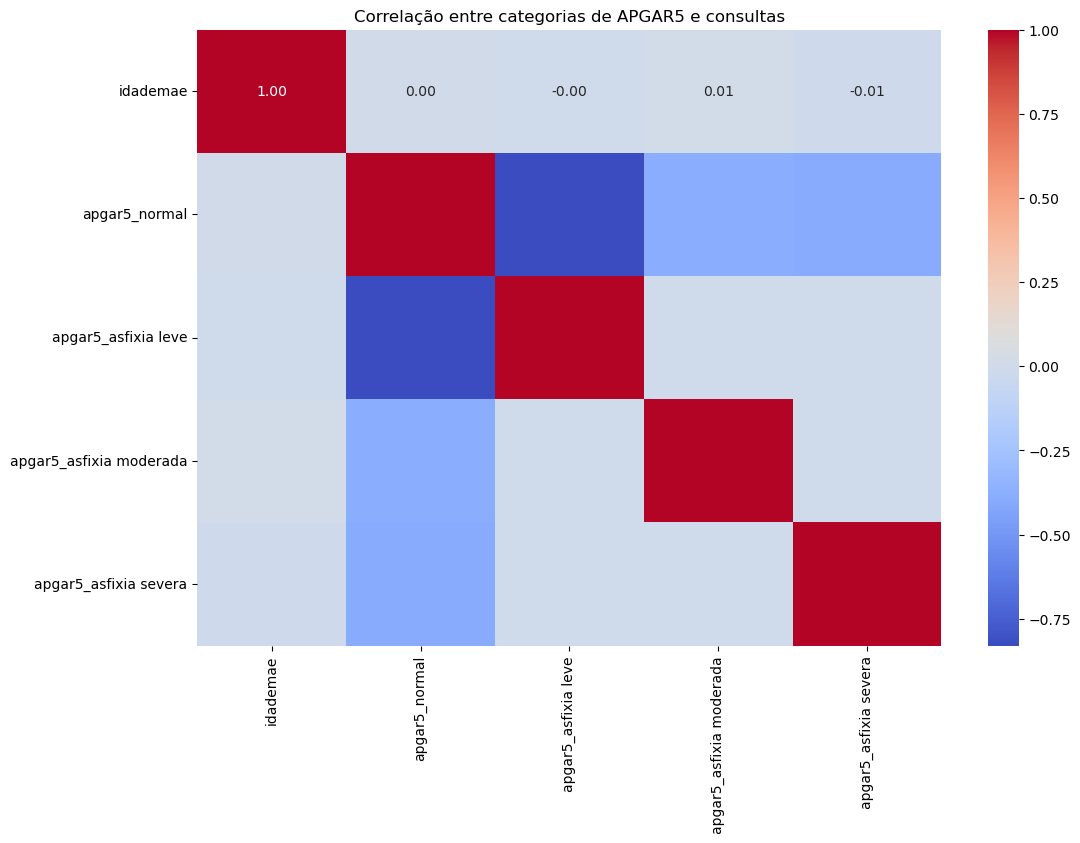

In [317]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre categorias de APGAR5 e Idade Mae')
plt.show()

In [311]:
#   Criando variáveis categóricas para eu poder correlacionar com as consultas:

df_apgar['consultas_cat'] = df_apgar['consultas'].replace({
    1: 'Nenhuma',
    2: 'de 1 a 3',
    3: 'de 4 a 6',
    4: '7 e mais',
    9: 'Ignorado'
})

In [292]:
# Cria variáveis dummy para a variável categórica consultas_cat
df_dummies_consultas = pd.get_dummies(df_apgar['consultas_cat'], prefix='consultas')

# Adiciona as variáveis dummy ao DataFrame original
df_final_consultas = pd.concat([df_final, df_dummies_consultas], axis=1)

In [307]:
df_final_consultas

,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,apgar5_cat,consultas_cat,apgar5_asfixia leve,apgar5_asfixia moderada,apgar5_asfixia severa,apgar5_normal,consultas_7 e mais,consultas_Ignorado,consultas_Nenhuma,consultas_de 1 a 3,consultas_de 4 a 6
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais,False,False,False,True,True,False,False,False,False
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,normal,7 e mais,False,False,False,True,True,False,False,False,False
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais,False,False,False,True,True,False,False,False,False
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,normal,de 4 a 6,False,False,False,True,False,False,False,False,True
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,32,2.0,12 anos ou mais,1.0,32 a 36 semanas,Única,4,9.0,normal,7 e mais,False,False,False,True,True,False,False,False,False
27024,1,19,1.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0,normal,7 e mais,False,False,False,True,True,False,False,False,False
27025,1,24,2.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal,7 e mais,False,False,False,True,True,False,False,False,False
27026,1,21,2.0,8 a 11 anos,1.0,32 a 36 semanas,Única,4,9.0,normal,7 e mais,False,False,False,True,True,False,False,False,False


In [309]:
# Seleciona as colunas específicas
colunas_selecionadas = ['apgar5_asfixia leve', 'apgar5_asfixia moderada', 'apgar5_asfixia severa', 'apgar5_normal', 'consultas_7 e mais', 'consultas_Ignorado', 'consultas_Nenhuma', 'consultas_de 1 a 3', 'consultas_de 4 a 6']

# Calcula a correlação entre as colunas selecionadas
correlacao_especifica = df_final_consultas[colunas_selecionadas].corr()

correlacao_especifica

,apgar5_asfixia leve,apgar5_asfixia moderada,apgar5_asfixia severa,apgar5_normal,consultas_7 e mais,consultas_Ignorado,consultas_Nenhuma,consultas_de 1 a 3,consultas_de 4 a 6
apgar5_asfixia leve,1.000000,-0.005518,-0.005757,-0.830026,-0.016236,-0.004730,0.006335,0.018549,0.005946
apgar5_asfixia moderada,-0.005518,1.000000,-0.002642,-0.380824,-0.020713,-0.002170,0.006129,0.015440,0.012399
apgar5_asfixia severa,-0.005757,-0.002642,1.000000,-0.397314,-0.036953,0.014213,0.031674,0.026783,0.011328
apgar5_normal,-0.830026,-0.380824,-0.397314,1.000000,0.036452,-0.000944,-0.020424,-0.032243,-0.014321
consultas_7 e mais,-0.016236,-0.020713,-0.036953,0.036452,1.000000,-0.064400,-0.288944,-0.344233,-0.795809
consultas_Ignorado,-0.004730,-0.002170,0.014213,-0.000944,-0.064400,1.000000,-0.008347,-0.009945,-0.022990
consultas_Nenhuma,0.006335,0.006129,0.031674,-0.020424,-0.288944,-0.008347,1.000000,-0.044619,-0.103151
consultas_de 1 a 3,0.018549,0.015440,0.026783,-0.032243,-0.344233,-0.009945,-0.044619,1.000000,-0.122889
consultas_de 4 a 6,0.005946,0.012399,0.011328,-0.014321,-0.795809,-0.022990,-0.103151,-0.122889,1.000000


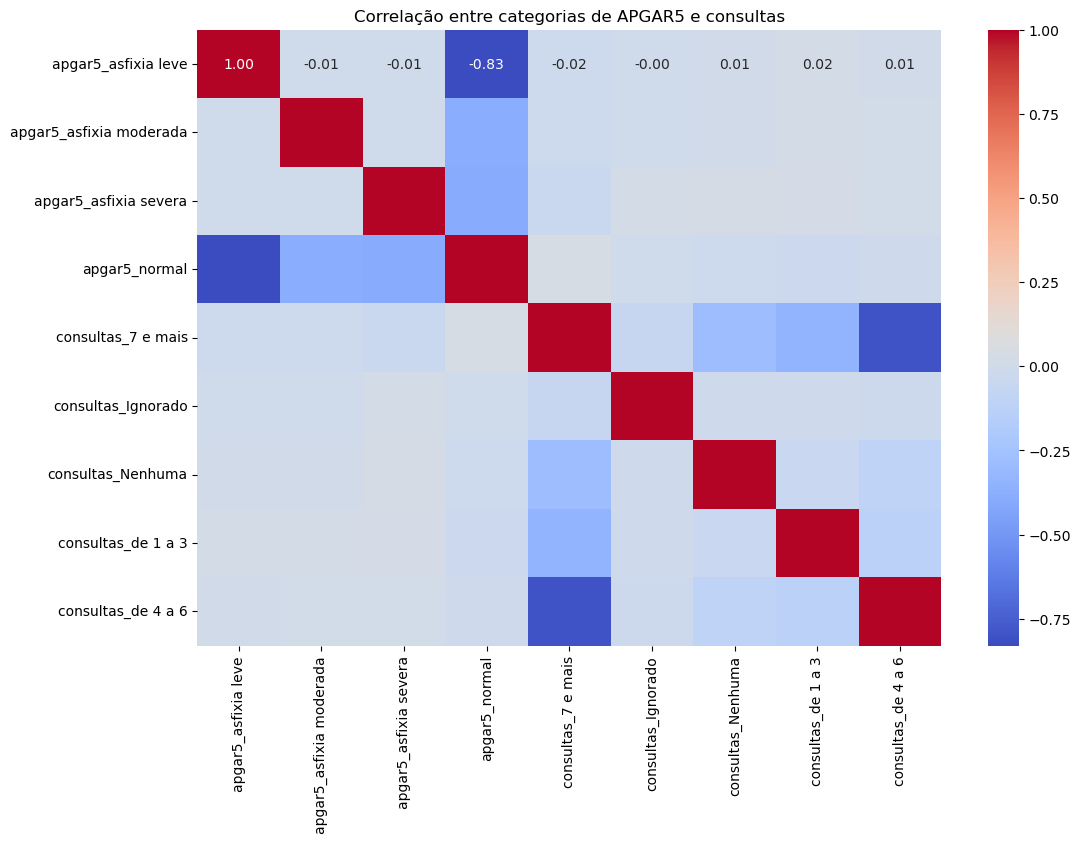

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_especifica, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre categorias de APGAR5 e consultas')
plt.show()